## Klassifikation

Wir nutzen ein Datenset, das Handschriftliche Ziffern in Form von 8x8 Feldern darstellt. Ein Beschreibung des Datensets gib es bei [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) und im 
[UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).


In [89]:
# Wir importieren eine Funktion zu laden des Datensets und rufen dieses auf.
from sklearn.datasets import load_digits
digits = load_digits()

In [90]:
# Die Daten und Metadaten sind in einem sogenannten "Bunch"-Objekt organisiert
type(digits)

sklearn.utils.Bunch

In [91]:
# Dieser Bunch hat folgende Attribute.
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [92]:
# Schauen wir uns mal die Beschreibung an
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [93]:
# Die eigentlichen Daten sind in einem numpy-Array abgelegt.
type(digits.data)

numpy.ndarray

In [94]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [95]:
# Schauen wir uns die Dimension der Matrix an - es handelt 
# sich um eine zweidimentionsale Matrix mit 1797 Zeilen und 64 Spalten. Es sind 1797 Bilder 
# und 64 (8x8) Features.
digits.data.shape

(1797, 64)

In [96]:
# Schauen wir uns die Targets an. Es ist ebenfalls ein
# numpy-array ...
type(digits.target)

numpy.ndarray

In [97]:
# ... allerding mit nur einer Dimension.
digits.target.shape

(1797,)

In [98]:
# Jeder Wert entspricht der geschriebenen Nummer
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [99]:
# Der Bunch hatte noch das Attribute "target_nams"
# Normalerweise wird jeder Zahl in "targent" hier ein Name zugeordnen.
# Da es sich aber tatsächlich um Ziffern von 0 - 9 handelt, ist das in diesem
# nicht wirklich nötig.
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [100]:
# In diesem Datensets gibt es zusätzlich noch ein Attribute "images".
# Es enthält für jedes gezeichnete Ziffer die Zahlen in ein 8x8 Matrix.
len(digits.images)

1797

In [101]:
# Schauen wir uns zum Beispiel die das erst Bild an
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [102]:
# oder das 10. Bild
digits.images[9]

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

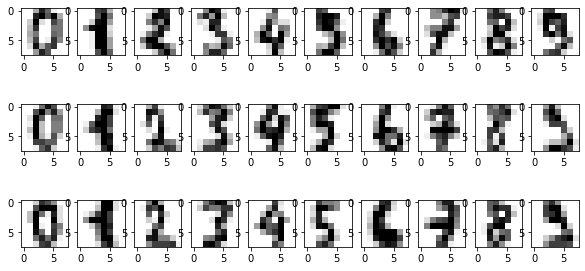

In [103]:
# Wir können die in dieser Form gespeicherten Farbintensitäten
# auch mit matplotlib anzeigen lassen. Hier zum Beispiel die
# ersten 30 Bilder (wenn man mehr haben möchte muss man in subplot
# mehr als 3 Zeilen angeben.)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 10, figsize=(10, 5))
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap=plt.cm.gray_r)

In [104]:
# Um einen Klassifikator für ein Klassifikation zu trainieren
# und dann später seine Güte zu bewerten, wird das Datenset 
# (genauer gesagt die Attribute "data" und "target") in
# ein Trainingsset (75%) und Testset (25%) aufgeteilt. Die Konvention
# ist hier eine großes X für den Variablen der Datenmatrix und ein kleine y
# für den Target-Vektor zu nutzen.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits['data'], digits['target'], random_state=1)

In [105]:
# Die Maße der zweidimensionalen Trainigs-Daten-Matrix
X_train.shape

(1347, 64)

In [106]:
# Die Maße der zweidimensionalen Test-Daten-Matrix
X_test.shape

(450, 64)

In [107]:
# Die Länge des Trainingsvektor entspricht der Anzahl an 
# Zeilen der Trianingsmatrix.
y_train.shape

(1347,)

In [108]:
# Die Länge des Testsvektors entspricht der Anzahl an 
# Zeilen der Testsmatrix.
y_test.shape

(450,)

In [109]:
# Wir werden zuerst mit einem k-Nearest-Neighbor-Klassifizierer Arbeiten
# und laden dazu die Klasse ...
from sklearn.neighbors import KNeighborsClassifier

# und erzeugen ein Objekt davon. Hierbei können wird die Anzahl an 
# zu betrachteten Nachbarn ansehen:
knn_clf = KNeighborsClassifier(n_neighbors=1)

In [110]:
# Jetzt trainieren wir den Klassifikator mit den Trainingsdaten.
# Dafür wird in scikit-learn unabhängig von Klassifikator die
# Methode "fit" genutzt.
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [111]:
# Herzlichen Glückwunsch - wir haben unser aller erstes 
# Klassifikator Modell gebaut und trainiert. 
# Jetzt kann mit diesem neue Daten (also Vektoren der Länger 64 die
# die 8x8 Bilder darstellen) um damit zu klassifizieren - in diesem
# Fall also Vorauszusagen, welche Ziffer dargestellt wurde.
#
# Wir haben unsere Testdaten noch parat und können die Methode "predict"
# des trainierten Klassifiers nutzen und erhalten die Voraussagen.
knn_clf.predict(X_test)

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       9, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 3, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 7, 0, 5,

In [112]:
# Da wir für das Testset aber auch wissen welche Ziffern tatsächlich 
# herauskommen sollte, können wir die Methode "score" des Klassifiers 
# nutzen. Diese führt die Voraussage durch und Vergleich sie mit den 
# tatsächlichen Target Werten.
knn_clf.score(X_test, y_test)

0.9888888888888889

In [116]:
# Jetzt führen wir die das gleich Verfahren (Erstellen, Traininen und Teste)
# diese Klassifiers mit mit 3 Nachbarn als Parameter durch.
knn_clf_3 = KNeighborsClassifier(n_neighbors=3)
knn_clf_3.fit(X_train, y_train)
knn_clf_3.score(X_test, y_test)

0.9911111111111112

In [117]:
# Das schön an scikit-learn ist, dass die Methoden bei Klassen
# gleichen Types gleich sind. Sprich anderen Klassifikatoren
# nutzen auch fit, predict und score.
# Anmerkung - bei einigen der folgenden Klassifikatoren wir 
# von bestimmten zufälligen Zuständen ausgeganen. Um diese
# fest zu setzen und somit die Analyse reproduzierbar zu machen
# kann man den Parameter random_state nutzen und mit einer Zahl
# versehen.
#
# Machen wir ein Klassifikation mit einem Random-Forest-Klassifikator:
from sklearn.ensemble import RandomForestClassifier
random_forest_cfl = RandomForestClassifier(random_state=1)

In [118]:
random_forest_cfl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [119]:
random_forest_cfl.score(X_test, y_test)

0.98

In [34]:
# Machen wir eine Klassfikation mit einem SVM-Klassifikator
from sklearn.svm import SVC
svm_clf = SVC(random_state=1)

In [35]:
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [194]:
svm_clf.score(X_test, y_test)

NameError: name 'svm_clf' is not defined

## Regression

Hier führen wir eine einfach Regression von zwei Feature also in zwei Dimensionen durch, da dies sich leichter visualisieren kann. Tatsächlich ist man aber in der Anzahl an Features nicht eingeschränkt. Ziel ist es ein Regression-Model zu erstellen, in dem man einen numerischen Eingabe-Wert (x) eingibt und einen numerischen Ausgabe-Wert (y) erhält.

In [140]:
# Wir erzeugen und ein künstlichen Datenset von 500 Datenpunkten
# mit Hilfe der Funktion make_regression. Mit dem Parameter 
# "noise" können wir angeben 
from sklearn.datasets import make_regression
X_reg, y_reg = make_regression(n_samples=500, n_features=1, noise=20, random_state=1)

In [141]:
X_reg

array([[-1.91835552e-01],
       [-5.37223024e-01],
       [ 5.64382855e-01],
       [ 1.93752881e+00],
       [ 1.20205486e+00],
       [-2.43483776e+00],
       [ 2.10025514e+00],
       [ 1.00088142e+00],
       [-7.67309826e-01],
       [-7.77858827e-01],
       [-1.09991490e-01],
       [-4.48738033e-01],
       [ 6.74570707e-01],
       [ 1.74481176e+00],
       [-2.26314243e-01],
       [ 1.62765075e+00],
       [ 3.69492716e-01],
       [ 8.25029824e-01],
       [ 8.65407629e-01],
       [ 3.67231814e-01],
       [ 7.78211279e-02],
       [ 1.04444209e+00],
       [ 8.52704062e-01],
       [ 5.82815214e-01],
       [-6.70662286e-01],
       [ 5.92472801e-01],
       [ 4.41364444e-01],
       [-2.46169559e-02],
       [ 1.38877940e+00],
       [ 4.77610182e-01],
       [ 1.61694960e+00],
       [-7.00398505e-01],
       [ 1.62284909e+00],
       [ 1.04008915e+00],
       [ 3.86539145e-01],
       [ 2.19069973e+00],
       [ 2.11124755e-01],
       [ 8.38983414e-01],
       [-3.5

In [142]:
X_reg.shape

(500, 1)

In [143]:
y_reg.shape

(500,)

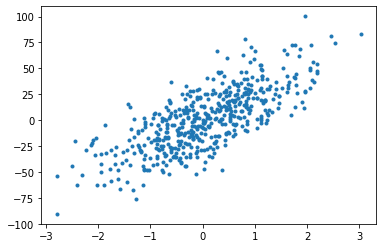

In [144]:
# Wir können die Daten zweidimensional plotten.
# Die x-Achse stellt die Eingangserte das, die y-Achse
# die davon abhängigen Werte.
# (mit "X_reg[:,0]" wird die erste und einziege Spalte, der prinzipiel
# n-dimensionalen Input-Werte-Matrix genutzt)
plt.plot(X_reg[:,0], y_reg, ".")

In [152]:
# Wir möchten für diese Daten eine lineares Regression-Modell erstellen,
# laden dafür die nötige Klasse und erstellen eine Instanz davon.

# y = w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n + b

from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [149]:
# Wir teilen unsere für eine spätere Bewertung der Güte in ein 
# Trainings und ein Testset auf.
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg)

In [155]:
# Das Fitting der Parameter erfolg mit der Methode "fit"
linear_regression.fit(X_reg_train, y_reg_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
# Wir können uns jetzt die Koeffizienten alss in diesem nut Fall w_1 anschauen. 
# Die Gerade hat also die Steigung 21.4
linear_regression.coef_

array([21.47000983])

In [157]:
# Zudem gibt es noch den y-Achsen-Abschnit bei 0 (Intercept)
linear_regression.intercept_

0.3741401814416643

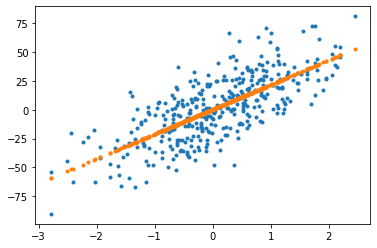

In [167]:
# Wir können nun die Trainingsdaten und die Gerade, die
# das lineare Modell repräsentiert, in einem Plot darstellen.
plt.plot(X_reg_train, y_reg_train, ".")
y_lm_predicted = linear_regression.predict(X_reg_train)
plt.plot(X_reg_train, y_lm_predicted, ".")

In [162]:
# Dieses trainierte Modell kann nun auf neue Werte angewandt werden
# zum Beipiel unserer Test-Datenset
linear_regression.predict(X_reg_test)

array([-14.03752085,  18.32316973,   4.70743611,  29.36094685,
        -0.45665278,  22.79832222,   0.72898721,  25.17818245,
        -8.96438408,  65.44667218, -15.13562113,   2.42291774,
        12.49144564, -23.56215227, -44.58938102,   1.46498318,
       -16.41351133,  17.44335824,  -2.26431417,   5.71586062,
       -35.57086027,  13.64229567,   1.07437482,   1.31016513,
        13.90444743, -16.74324995,  16.00030318,  33.51007546,
       -39.84264442,  -9.91396466,  -3.51022048, -10.54243949,
         1.67844748, -16.2685874 , -39.51674871,  10.03898347,
       -18.98396119,  -2.54529435, -17.44965857,  -7.00941143,
        -6.20006298, -15.66735573, -23.59648208,  35.01302475,
        17.66594492,  -6.73851273,  -3.89491069, -18.11833055,
       -29.60864987,  31.53634068,  -9.2257145 ,   2.65474311,
       -14.68373155,  -6.63580725, -23.61452399, -40.34074748,
         6.4431905 , -15.96897946,  -8.70460294,  -3.7099071 ,
        54.65731796, -37.32560058, -26.9477088 ,  -0.38

In [220]:
# Für das Testdatenset kennen wir die tatsächlichen y-Werte und
# können mit der Methode "score" eine Vorraussage durchführen und
# diese mit den Werten vergleich um die Güte der Voraussage zu bewerten.
linear_regression.score(X_reg_test, y_reg_test)

0.6112124559115575

In [163]:
# Das gleiche Vorgehene können wir nun mit anderen Regression-Methoden
# nutzen. Zum Beispiel mit der SVM-Methode
from sklearn.svm import SVR
svm_regression = SVR()
svm_regression.fit(X_reg_train, y_reg_train)
svm_regression.score(X_reg_test, y_reg_test)

0.44730961629856114

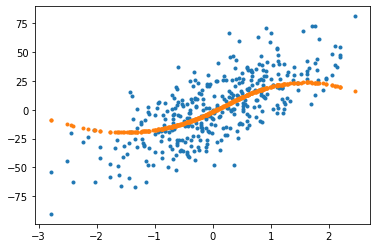

In [166]:
plt.plot(X_reg_train, y_reg_train, ".")
y_svm_predicted = svm_regression.predict(X_reg_train)
plt.plot(X_reg_train, y_svm_predicted, ".")

## Dimensionsreduktion

In diesem Beispiel wollen wir eine mehrdimensionales Daten set (64 Dimensionen) in seiner Dimensionalität reduzieren um es in 2 Dimensionen plotten zu können. Wir nutzen ein Datenset, das handschriftliche Ziffern in Form von 8x8 Feldern darstellt. Ein Beschreibung des Datensets gib es bei [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) und im 
[UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).


In [2]:
# Wir laden das Datenset
from sklearn.datasets import load_digits
digits = load_digits()

In [171]:
# Wir wollen mit einer Pricinple Component Analysis die
# Reduktion durchführen, laden dafür die Klasse und erzeugen
# eine Instanz davon. Wir geben an nur zwei Dimensionen
# ("components") zu wünschen.
from sklearn.decomposition import PCA
pca = PCA(random_state=1, n_components=2)

In [172]:
# Wir können die Tranformation mit der Funktion
# fit_transform durchführen.
pca_result = pca.fit_transform(digits.data)

In [174]:
# Wir erhalten eine Matrix mit der gleichen Anzahl an Datenpunkte
# aber nur zwei Spalten
pca_result.shape

(1797, 2)

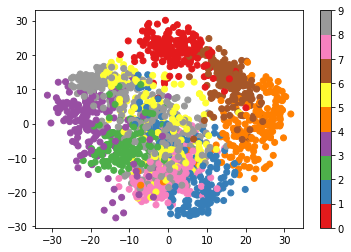

In [192]:
# Wir können nun die beiden Spalten der resultierenden Matrix 
# plotten.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=digits.target, cmap="Set1")
plt.colorbar()

In [193]:
# Wir können das gleich Vorgehen mit dem t-SNE-Verfahren durchführen
from sklearn.manifold import TSNE
tsne = TSNE(random_state=1, n_components=2)
tsne_result = tsne.fit_transform(digits.data)